In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import MINST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

**OUR CODE**

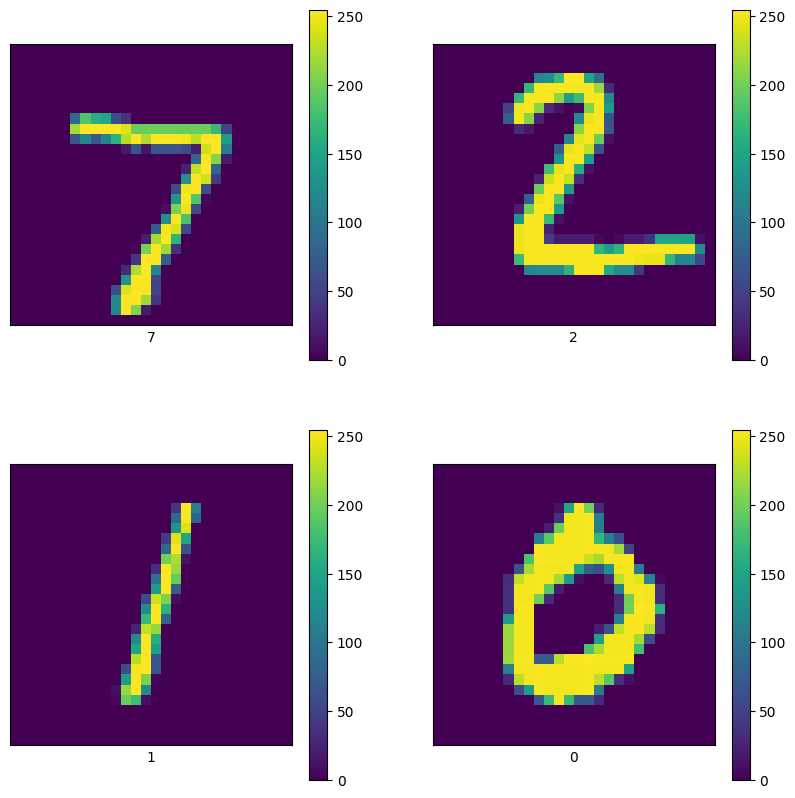

In [ ]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(y_test[i])
    plt.colorbar()

In [ ]:
# normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

**OUR CODE**

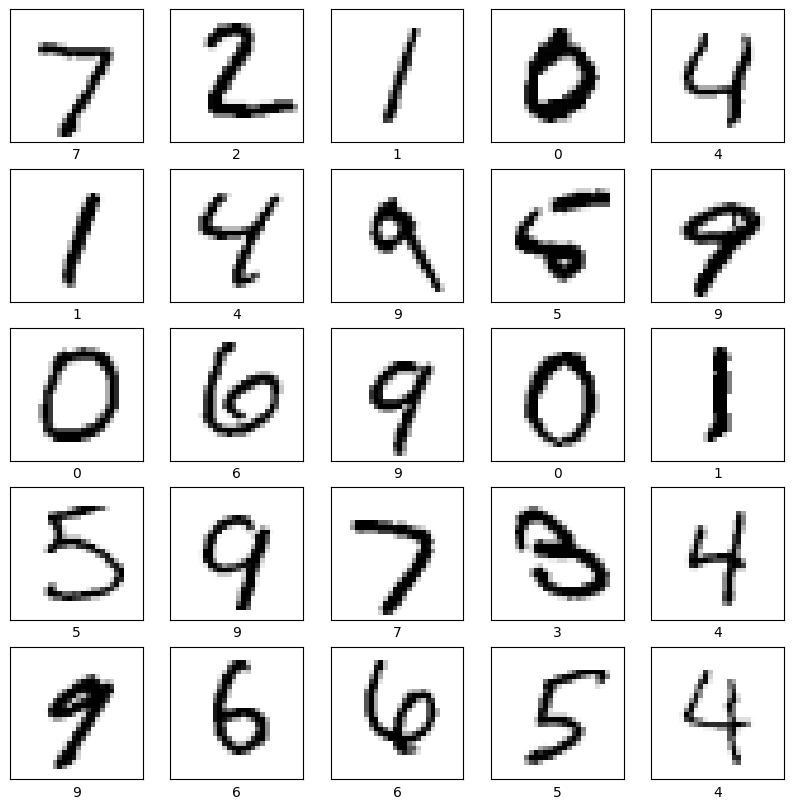

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i])

In [ ]:
# Parameters
learning_rate = 0.0055
training_epochs = 15
batch_size = 100
display_step = 1

In [ ]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 128 # 2nd layer number of features
n_hidden_3 = 64 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [ ]:
# reshape MINST data
ds_train = x_train.reshape(x_train.shape[0], n_input)
ds_test = x_test.reshape(x_test.shape[0], n_input)
label_test=np.zeros(shape=(y_test.shape[0],n_classes),dtype="float32")
for k in range(y_test.shape[0]):
  label_test[k][y_test[k]]=1.0

In [ ]:
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [ ]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [ ]:
# Create model
def multilayer_perceptron(x, weights, biases, w):
    if w == 1:
        # Hidden layer with RELU activation
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_1 = tf.nn.silu(layer_1)
        # Hidden layer with RELU activation
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        layer_2 = tf.nn.silu(layer_2)
        # Hidden layer with RELU activation
        layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
        layer_3 = tf.nn.silu(layer_3)

    if w == 2:
        # Hidden layer with RELU activation
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_1 = tf.nn.relu(layer_1)
        # Hidden layer with RELU activation
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        layer_2 = tf.nn.relu(layer_2)
        # Hidden layer with RELU activation
        layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
        layer_3 = tf.nn.relu(layer_3)

    if w == 3:
        # Hidden layer with RELU activation
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_1 = tf.nn.sigmoid(layer_1)
        # Hidden layer with RELU activation
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        layer_2 = tf.nn.sigmoid(layer_2)
        # Hidden layer with RELU activation
        layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
        layer_3 = tf.nn.sigmoid(layer_3)

    if w == 4:
        # Hidden layer with RELU activation
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_1 = tf.nn.tanh(layer_1)
        # Hidden layer with RELU activation
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        layer_2 = tf.nn.tanh(layer_2)
        # Hidden layer with RELU activation
        layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
        layer_3 = tf.nn.tanh(layer_3)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer

Epoch: 0001 cost= 0.642511188
Epoch: 0002 cost= 0.243226949
Epoch: 0003 cost= 0.172828038
Epoch: 0004 cost= 0.137003445
Epoch: 0005 cost= 0.115066942
Epoch: 0006 cost= 0.096770166
Epoch: 0007 cost= 0.086835705
Epoch: 0008 cost= 0.078863082
Epoch: 0009 cost= 0.070949257
Epoch: 0010 cost= 0.062463273
Epoch: 0011 cost= 0.064020441
Epoch: 0012 cost= 0.052859066
Epoch: 0013 cost= 0.051199726
Epoch: 0014 cost= 0.048354964
Epoch: 0015 cost= 0.043333182
Optimization Finished!
Accuracy: 0.9658
Epoch: 0001 cost= 2.225008814
Epoch: 0002 cost= 0.749861302
Epoch: 0003 cost= 0.565878332
Epoch: 0004 cost= 0.467756067
Epoch: 0005 cost= 0.416180734
Epoch: 0006 cost= 0.392944529
Epoch: 0007 cost= 0.365741558
Epoch: 0008 cost= 0.341067220
Epoch: 0009 cost= 0.328249285
Epoch: 0010 cost= 0.326801591
Epoch: 0011 cost= 0.309329625
Epoch: 0012 cost= 0.292646898
Epoch: 0013 cost= 0.275927733
Epoch: 0014 cost= 0.273950069
Epoch: 0015 cost= 0.265550273
Optimization Finished!
Accuracy: 0.9237


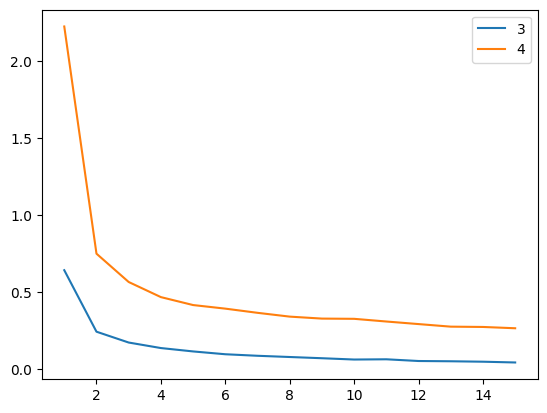

In [ ]:
# Launch the graph
for activation in range (3,5) :
    # Construct model
    pred = multilayer_perceptron(x, weights, biases, activation)

    # Define loss and optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    # Initializing the variables
    init = tf.global_variables_initializer()
    xVal = []
    yVal = []
    with tf.Session() as sess:
        sess.run(init)

        batch_xs=np.zeros(shape=(batch_size,784),dtype="float32")
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(ds_train.shape[0]/batch_size)
            # Loop over all batches
            for i in range(total_batch):
                batch_ys=np.zeros(shape=(batch_size,n_classes),dtype="float32")
                for k in range(batch_size):
                    index = k+batch_size*i
                    batch_xs[k] = ds_train[index]
                    batch_ys[k][y_train[index]]=1.0
                # Run optimization op (backprop) and cost op (to get loss value)
                _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys})
                # Compute average loss
                avg_cost += c / total_batch
            # Display logs per epoch step
            if epoch % display_step == 0:
                xVal.append(epoch + 1)
                yVal.append(avg_cost)
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
        plt.plot(xVal, yVal, label = activation)
        print("Optimization Finished!")

        # Test model
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print("Accuracy:", accuracy.eval({x: ds_test, y: label_test}))
plt.legend()
plt.show()

silu - 1

relu - 2

sigmod - 3

Двухслойный: Epoch: 0015 cost= 1.046521968 Accuracy: 0.9586 <br>

- Что такое линейный перцептрон и почему из них невозможно составить
«хорошую» сеть?\
Линейный перцептрон - перцептрон, который имеет некоторый лимит активации и выход перцептрона является 1, если сумма произведений весов на значения входов превышает этот лимит и -1 в противном случае. Нейронная сеть, основанная только на линейных перцептронах, плохо справляется с задачами, в которых необходимо обрабатывать нелинейные данные.
- Что представляет собой перцептрон Розенблатта, какая в нём используется
функция ошибки и правило обучения перцептрона?\
Перцептрон Розенблатта – это линейная модель бинарной классификации. Один перцептрон – это просто разновидность линейной регрессии.
Функция ошибки, называемая критерием перцептрона:\
$E_p(\omega)=-\underset{x \in M}\Sigma y(x)(\omega ^ T x)$;\
Правило обучения перцептрона:\
$\omega ^ (\tau + 1) = \omega ^ \tau - \eta \Delta_\omega E_p(\omega) = \omega ^ \tau + \eta t_n x_n$
- Что такое многослойный перцептрон?\
Многослойный перцептрон или нейронная сеть прямого распространения - конструкция, состоящая из трех или более слоев, в которой 2 или более обучаемых слоя (скрытые и выходной), а также входной слой.
- Как правильно объединять нейроны в сеть?\
Отдельные нейроны лучше объединять в слои, при этом можно рассматривать вектор входов и выходов слоя нейронов как единое целое. Делается это для ускорения обучения сетей на существующих системах. Конкретный вид нейронной сети зависит, в первую очередь, от решаемой задачи.
- Перечислите рассмотренные в данной работе функции активации, в чём их
основное отличие, какая является наиболее эффективной и почему?\
    - Ступенчатая функция
    - Линейная функция
    - Логистический сигмоид
    - Гиперболический тангенс
    - Функция ReLU (и ее модификации)\
Функция ReLU является наиболее эффективной потому, что для ее вычисления требуется меньше операций (процессорного времени).